In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns

# ***1 - Business Problem***

Perform Clustering for the crime data and identify the number of clusters formed and draw inferences

# ***2-Data collection and description***

In [ ]:
df = pd.read_csv('/content/crime_data.csv')

In [ ]:
df1 = df.copy()

In [ ]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
df1.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [ ]:
df1.loc[:,'Total'] = df1.sum(numeric_only=True, axis=1)

In [ ]:
df1

,City,Murder,Assault,Urbanpop,Rape,Min,Total
0,Alabama,13.2,236,58,21.2,328.4,670.0
1,Alaska,10.0,263,48,44.5,365.5,741.0
2,Arizona,8.1,294,80,31.0,413.1,834.3
3,Arkansas,8.8,190,50,19.5,268.3,545.4
4,California,9.0,276,91,40.6,416.6,842.2
5,Colorado,7.9,204,78,38.7,328.6,665.1
6,Connecticut,3.3,110,77,11.1,201.4,406.1
7,Delaware,5.9,238,72,15.8,331.7,669.3
8,Florida,15.4,335,80,31.9,462.3,940.0
9,Georgia,17.4,211,60,25.8,314.2,645.8


In [ ]:
df1.describe()

,Murder,Assault,Urbanpop,Rape,Min,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,7.78800,170.760000,65.540000,21.232000,265.320000,538.42800
std,4.35551,83.337661,14.474763,9.366385,98.350844,200.15036
min,0.80000,45.000000,32.000000,7.300000,93.400000,189.00000
25%,4.07500,109.000000,54.500000,15.075000,187.950000,383.82500
50%,7.25000,159.000000,66.000000,20.100000,257.450000,519.55000
75%,11.25000,249.000000,77.750000,26.175000,348.500000,712.57500
max,17.40000,337.000000,91.000000,46.000000,462.300000,940.00000


***Barplot***

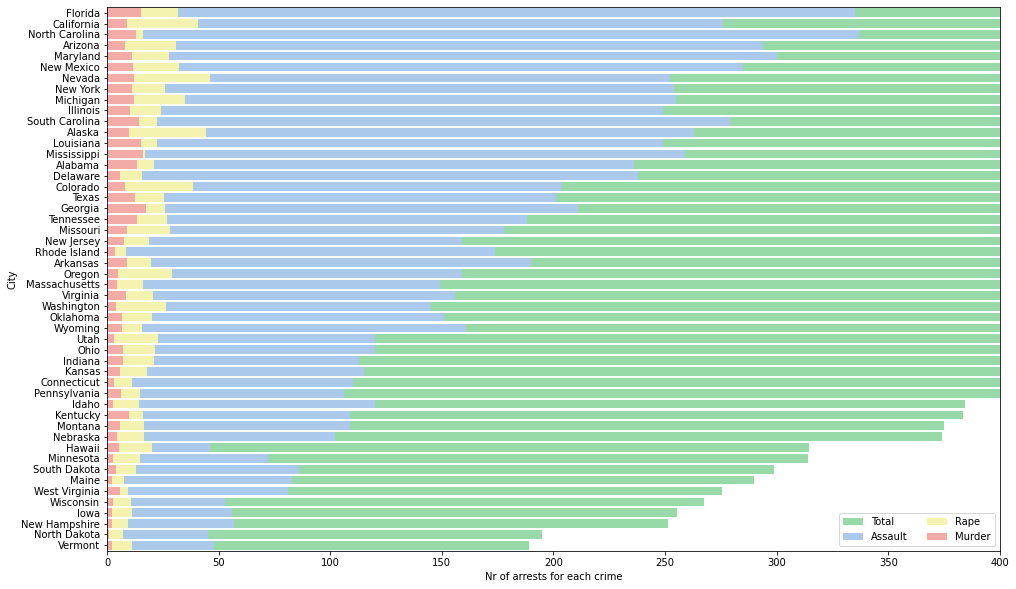

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df1.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

***Scatter Plot***

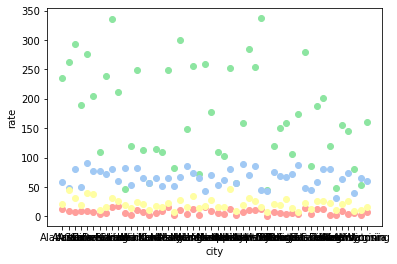

In [ ]:
plt.scatter(df1.City, df1.Murder, color='r')
plt.scatter(df1.City, df1.Assault, color='g')
plt.scatter(df1.City, df1.Urbanpop, color='b')
plt.scatter(df1.City, df1.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

# **3 - Finding out the optimal number of clusters**

In [ ]:
X = df1[['Murder', 'Assault', 'Rape', 'Urbanpop']]

In [ ]:
df1_norm = preprocessing.scale(X)


In [ ]:
#standardize the data to normal distribution
df1_norm = pd.DataFrame(df1_norm) 

In [ ]:
df1_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


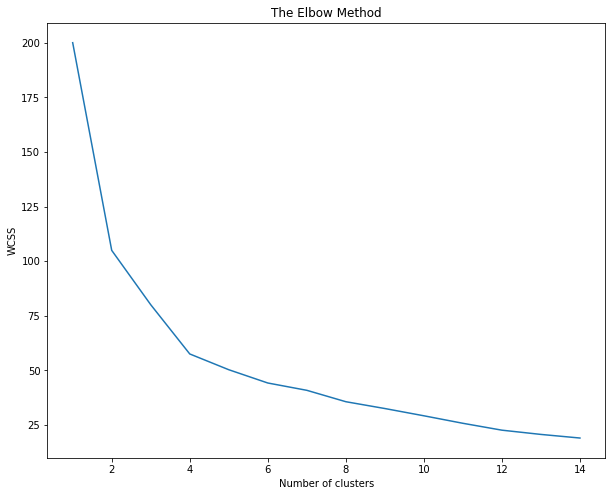

In [ ]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***The scree plot levels off at k=4 and let's use it to determine the clusters***

# ***4 - Analysing the data***

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_norm)

In [ ]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [ ]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [ ]:
df1['cluster'] = cluster

In [ ]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Min,Total
cluster,,,,,,
1,5.7,138.9,73.9,18.8,237.2,480.0
2,13.9,243.6,53.8,21.4,332.7,679.4
3,10.8,257.4,76.0,33.2,377.4,765.6
4,3.6,78.5,52.1,12.2,146.4,296.4


**Checking scatter plot between Murder,Assault and Rape**

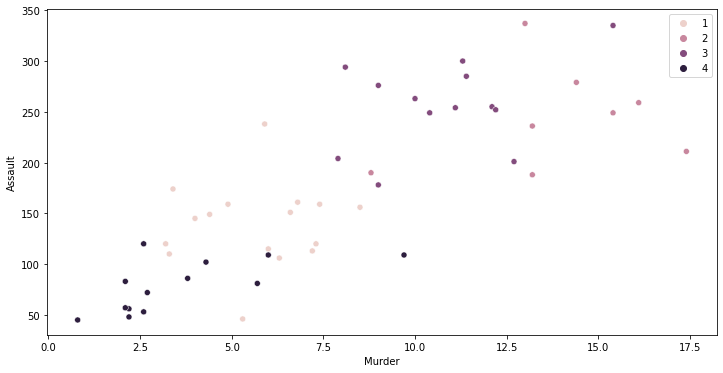

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Murder'], y = df1['Assault'],hue=y_kmeans1)

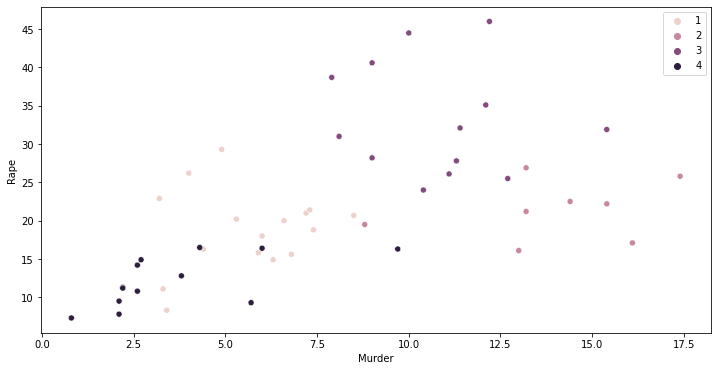

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Murder'], y = df1['Rape'],hue=y_kmeans1)

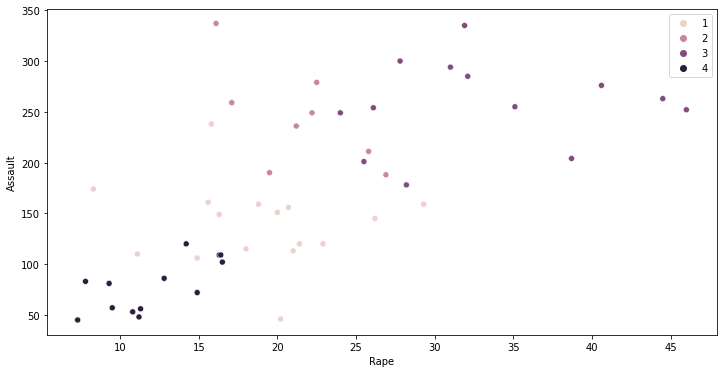

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Rape'], y = df1['Assault'],hue=y_kmeans1)

In [ ]:
stats = df1.sort_values("Total", ascending=True)
df1_total= pd.DataFrame(stats)

In [ ]:
df1_total

,City,Murder,Assault,Urbanpop,Rape,Min,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,189.0,4
33,North Dakota,0.8,45,44,7.3,97.1,195.0,4
28,New Hampshire,2.1,57,56,9.5,124.6,251.3,4
14,Iowa,2.2,56,57,11.3,126.5,255.2,4
48,Wisconsin,2.6,53,66,10.8,132.4,267.4,4
47,West Virginia,5.7,81,39,9.3,135.0,275.7,4
18,Maine,2.1,83,51,7.8,143.9,289.9,4
40,South Dakota,3.8,86,45,12.8,147.6,299.0,4
22,Minnesota,2.7,72,66,14.9,155.6,313.9,4
10,Hawaii,5.3,46,83,20.2,154.5,314.3,1


# ***5-Conclusion***

**1 - Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa**

**2 = Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa**

**3 - As with murder and assault, also rates of rape and assault show clearer correlations**